In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score, plot_confusion_matrix

from joblib import parallel_backend

%matplotlib inline

In [2]:
data_df = pd.read_csv(r"F:\Personal Interest\Data science\Kaggle\Credit Card Fraud Detection\Data\creditcard.csv")

print(data_df.shape)

data_df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data = data_df.copy()

In [5]:
data.drop('Time', axis=1, inplace=True)
data.dropna(inplace=True)

In [6]:
non_fraud = data[data['Class'] == 0] # filtering only non-fraud cases
fraud = data[data['Class'] == 1] # filtering fraud cases

print("Statistics of 'Amount' column in data for non-fraud class: ")
print(non_fraud['Amount'].describe())

print("Statistics of 'Amount' column in data for fraud class: ")
print(fraud['Amount'].describe())

Statistics of 'Amount' column in data for non-fraud class: 
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64
Statistics of 'Amount' column in data for fraud class: 
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


In [7]:
fraud_repeat = pd.DataFrame(
    np.repeat(fraud.values, 9, axis=0),
    columns = data.columns
    )
data = pd.concat([data, fraud_repeat], ignore_index=True)

In [8]:
fraud = data[data['Class'] == 1]

print("After replicating data, value count of fraud class ")
print(fraud.shape[0])

After replicating data, value count of fraud class 
4920


In [9]:
# standard normalization of Amount column

stdnorm = StandardScaler()

data['Amount'] = stdnorm.fit_transform(data['Amount'].values.reshape(-1,1))

data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.242763,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.344365,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158001,0.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.138388,0.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.075436,0.0


In [10]:
data.shape

(289235, 30)

In [11]:
# data split for making training and test set

X = data.drop('Class', axis=1).values
y = data['Class'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size = 0.2, 
    random_state = 0
    )

In [12]:
# Creating various models

with parallel_backend('threading', n_jobs=2):
    # KNN Model
    knn = KNeighborsClassifier(n_neighbors=6)
    knn.fit(X_train, y_train)
    knn_ypred = knn.predict(X_test)

    print("knn done.")

    # Logostic Regression Model
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    lr_ypred = lr.predict(X_test)

    print("lr done.")

    # SVM 
    svm = SVC()
    svm.fit(X_train, y_train)
    svm_ypred = svm.predict(X_test)

    print("svm done.")

    # Random Forest Tree
    rft = RandomForestClassifier(max_depth = 6)
    rft.fit(X_train, y_train)
    rft_ypred = rft.predict(X_test)

    print("rft done.")

knn done.
lr done.
svm done.
rft done.


KNN
[[56800    47]
 [    0  1000]]


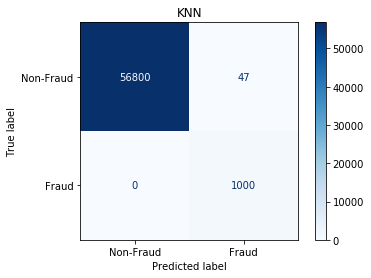

LR
[[56822    25]
 [  178   822]]


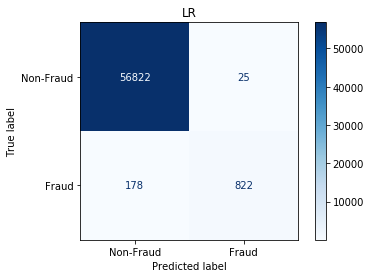

SVM
[[56835    12]
 [  111   889]]


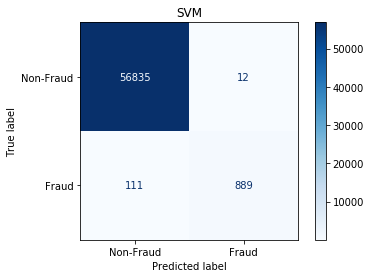

RFT
[[56827    20]
 [  149   851]]


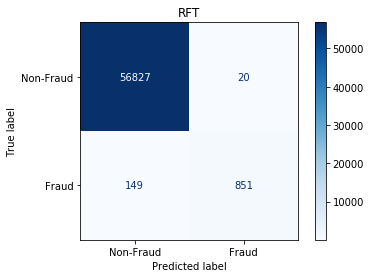

In [14]:
models = {'KNN':[knn, knn_ypred], 'LR':[lr, lr_ypred], 'SVM':[svm, svm_ypred], 'RFT':[rft, rft_ypred]}
class_names = ['Non-Fraud','Fraud']
accuracy = {}
f1_score_dict = {}
precision = {}
recall = {}

for model, model_output in models.items():
    acc = accuracy_score(y_test, model_output[1])
    pre = precision_score(y_test, model_output[1])
    rec = recall_score(y_test, model_output[1])
    f1_sc = f1_score(y_test, model_output[1])
    accuracy[model] = acc
    precision[model] = pre
    recall[model] = rec
    f1_score_dict[model] = f1_sc

    disp = plot_confusion_matrix(
        model_output[0], X_test, y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues
    )

    disp.ax_.set_title(model)

    print(model)
    print(disp.confusion_matrix)

    plt.show()


In [18]:
print(pd.Series(accuracy).to_frame('Accuracy'))
print(pd.Series(recall).to_frame('Recall'))
print(pd.Series(precision).to_frame('Precision'))
print(pd.Series(f1_score_dict).to_frame('F1 Score'))

     Accuracy
KNN  0.999188
LR   0.996491
SVM  0.997874
RFT  0.997079
     Recall
KNN   1.000
LR    0.822
SVM   0.889
RFT   0.851
     Precision
KNN   0.955110
LR    0.970484
SVM   0.986681
RFT   0.977038
     F1 Score
KNN  0.977040
LR   0.890092
SVM  0.935297
RFT  0.909674
